In [1]:
# Libraries
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import graph_tool.all as gt
#--+ missing
import inspect
if not hasattr(inspect, 'getargspec'):
    inspect.getargspec = inspect.getfullargspec

# Why Graph-tool

* [Graph-tool performance comparison](https://graph-tool.skewed.de/performance)

<img src="https://graph-tool.skewed.de/static/doc/_images/price-network.png" width=50%>

# Introduction

## Creating a graph

In [2]:
# by default, new graphs are directed
g = gt.Graph()

# if you want an undirected graphs
ug = gt.Graph(directed=False)

## Adding vertices and edges linking vertices

In [3]:
# adding vertices one-by-one
v1 = g.add_vertex()
v2 = g.add_vertex()

In [4]:
# adding multiple vertices in a row
vlist = g.add_vertex(2)

In [5]:
# edges
e = g.add_edge(v1, v2)

In [6]:
# calling edges
print(e.source(), e.target())

0 1


## Iterating

In [7]:
# over vertices and edges
for v in g.vertices():
    print(v)
    

for e in g.edges():
    print(e)

0
1
2
3
(0, 1)


In [8]:
# over the neighbors of a vertex
for v in g.vertices():
    for e in v.out_edges():
        print(e)
    for w in v.out_neighbors():
        print(w)

(0, 1)
1


## Drawing

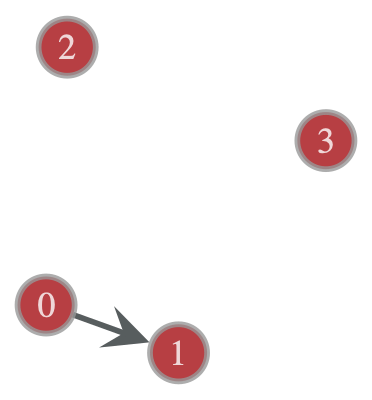

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x18fc2d890, at 0x190d48150>

In [9]:
# gt has a builtin function
gt.graph_draw(g,
           vertex_text=g.vertex_index,
           vertex_font_size=18,
           output_size=(200, 200),
           #output="simle-graph.png"
          )

## Save and Load

```python
# create a graph
g = Graph()

# write data to a compressed, xml
g.save("my_graph.xml.gz")

# load data back
g2 = load_graph("my_graph.xml.gz")
```

# Percolation theory and network robustness

## Karate club

In [10]:
#--+ Load graph
# karate club
g = gt.collection.data["karate"]

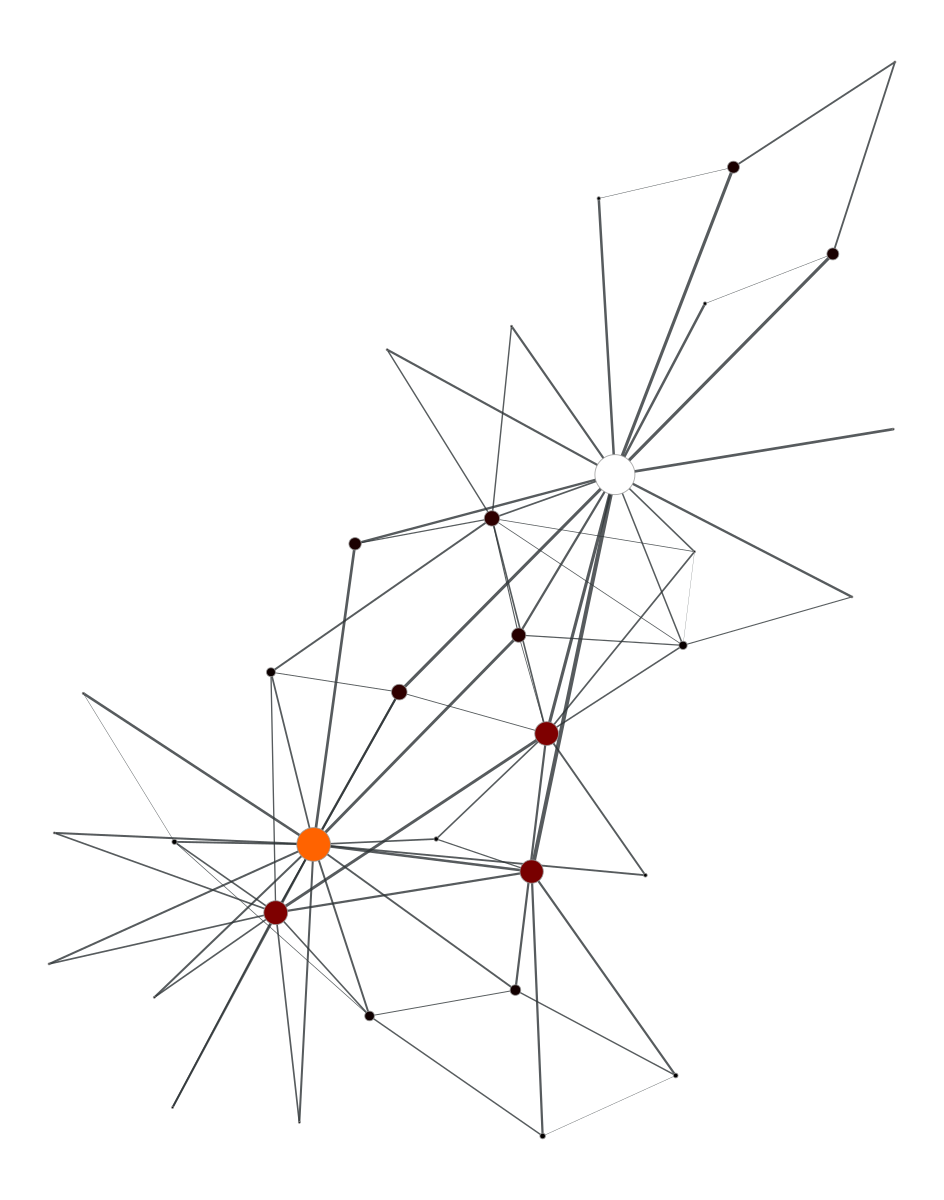

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x190d33ad0, at 0x1996afed0>

In [11]:
#--+ Draw
# let's compute betweenness
vp, ep = gt.betweenness(g)
# let's use betwenness in our graph
gt.graph_draw(g, 
              vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(vp, mi=1, ma=20),
              edge_pen_width=gt.prop_to_size(ep, mi=0, ma=2),
              vcmap=cm.gist_heat,
              vorder=vp)


Basic info:
    - Number of nodes: 34
    - Number of edges: 78
    - Size largest component: <GraphView object, undirected, with 34 vertices and 78 edges, 1 internal vertex property, 2 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x199662dd0, at 0x1996a2c50>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x199662dd0, at 0x18fc2f690>, False), at 0x199662dd0>
    - Pseudo diameter: 5.0


Degee:
    - Average 4.588235294117647
    - Max 17
    - Min 1



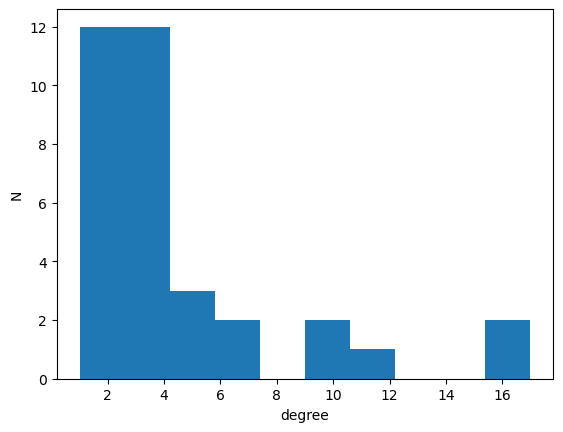


Centrality:
    - Max betweenness: 0.4376352813852814
    - Max eigenvector: 0.3733633953484787



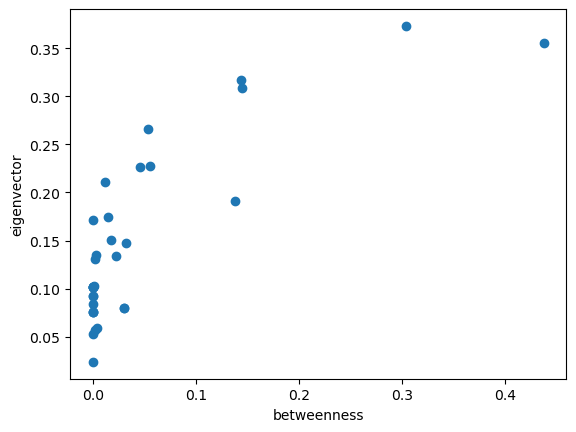

In [12]:
# --+ Descriptive analysis
# Basic info
print("""
Basic info:
    - Number of nodes: {}
    - Number of edges: {}
    - Size largest component: {}
    - Pseudo diameter: {}
""".format(len(g.get_vertices()), 
           len(g.get_edges()), 
           gt.extract_largest_component(g),
           gt.pseudo_diameter(g)[0])
)

# Degree
degree = [i.out_degree() for i in g.vertices()]
print("""
Degee:
    - Average {}
    - Max {}
    - Min {}
""".format(np.mean(degree),
          max(degree),
          min(degree))
     )

plt.hist(degree)
plt.xlabel("degree")
plt.ylabel("N")
plt.show()

# Centrality
ee, x = gt.eigenvector(g)
print("""
Centrality:
    - Max betweenness: {}
    - Max eigenvector: {}
""".format(np.array([i for i in vp]).max(),
          np.array([i for i in x]).max())
     )

plt.scatter([i for i in vp], [i for i in x])
plt.xlabel("betweenness")
plt.ylabel("eigenvector")
plt.show()

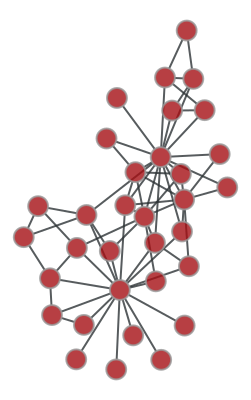


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d03290>
        
        Network viz, node(s) removed 1
        
        


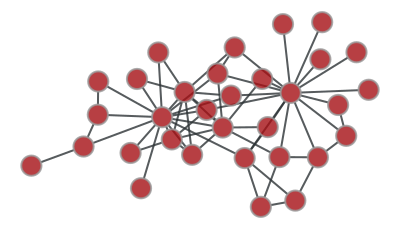


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x19968a150>
        
        Network viz, node(s) removed 2
        
        


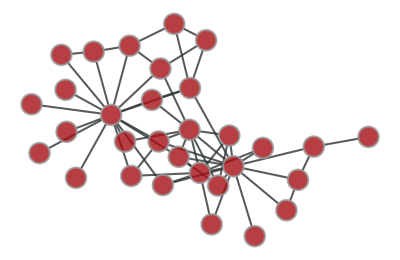


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d0d3d0>
        
        Network viz, node(s) removed 3
        
        


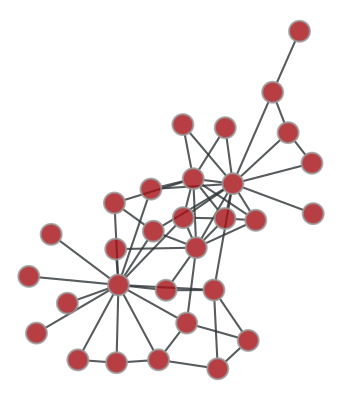


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d0f950>
        
        Network viz, node(s) removed 4
        
        


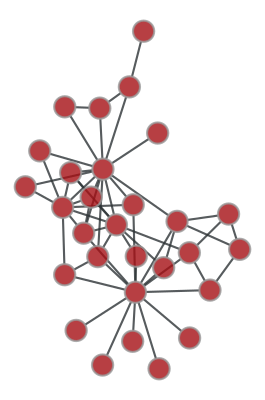


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1998ea390>
        
        Network viz, node(s) removed 5
        
        


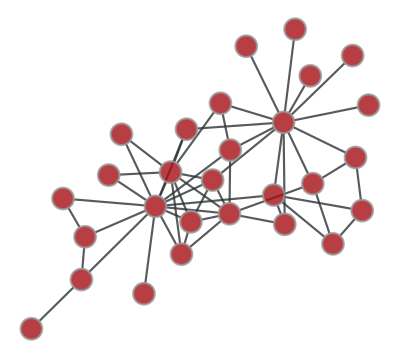


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d10e10>
        
        Network viz, node(s) removed 6
        
        


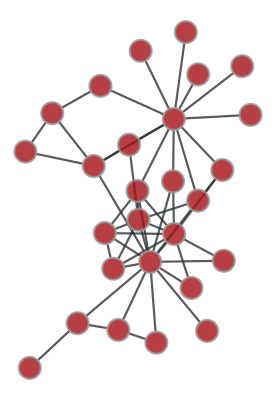


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d11750>
        
        Network viz, node(s) removed 7
        
        


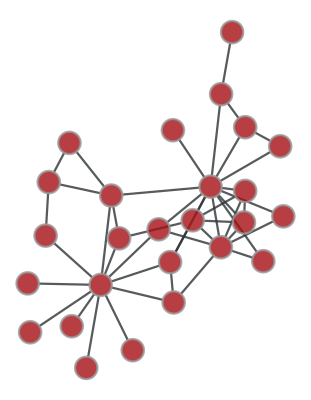


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d11610>
        
        Network viz, node(s) removed 8
        
        


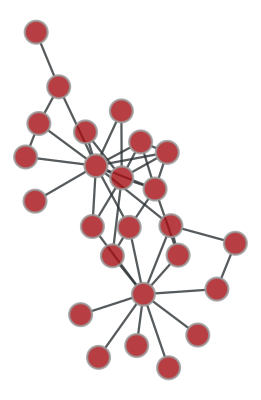


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x199727ad0>
        
        Network viz, node(s) removed 9
        
        


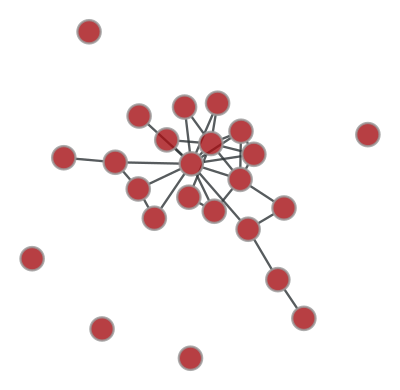


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6ce9d50>
        
        Network viz, node(s) removed 10
        
        


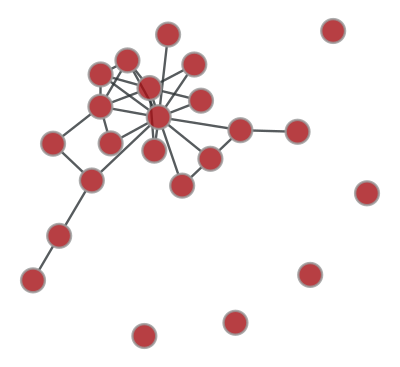


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d11f90>
        
        Network viz, node(s) removed 11
        
        


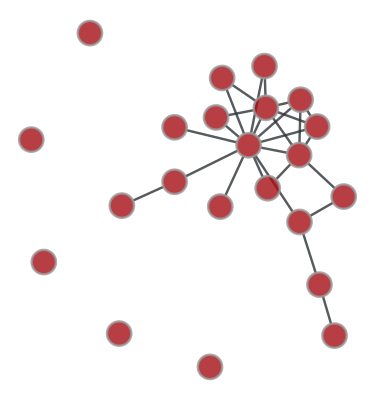


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d12150>
        
        Network viz, node(s) removed 12
        
        


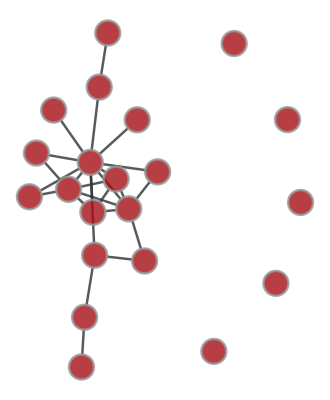


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d120d0>
        
        Network viz, node(s) removed 13
        
        


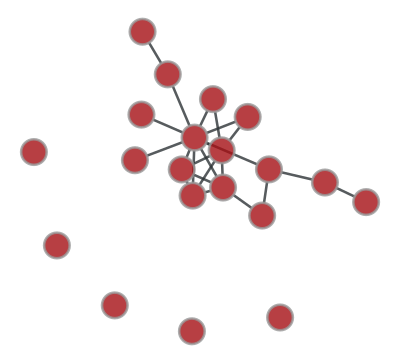


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d13390>
        
        Network viz, node(s) removed 14
        
        


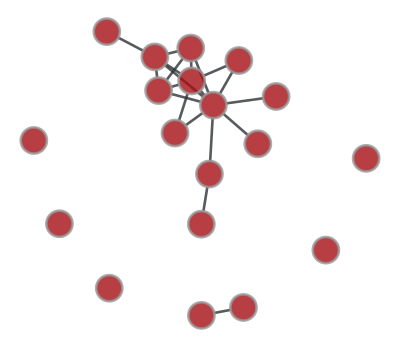


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d13a50>
        
        Network viz, node(s) removed 15
        
        


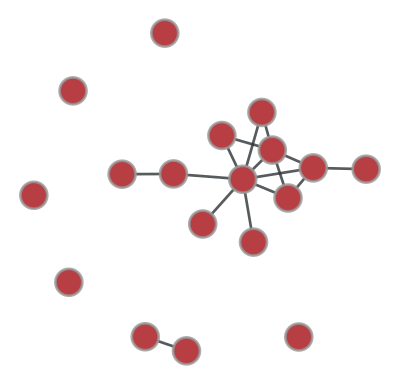


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d13b50>
        
        Network viz, node(s) removed 16
        
        


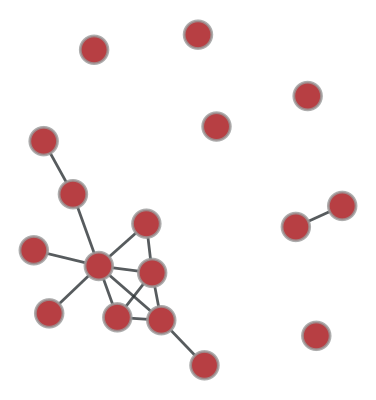


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18050>
        
        Network viz, node(s) removed 17
        
        


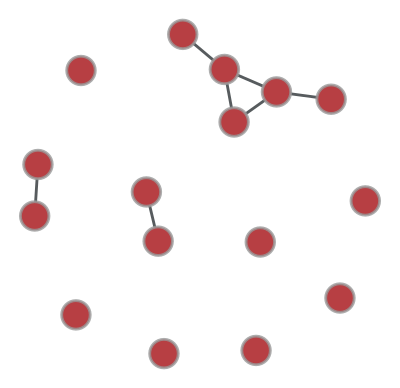


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18150>
        
        Network viz, node(s) removed 18
        
        


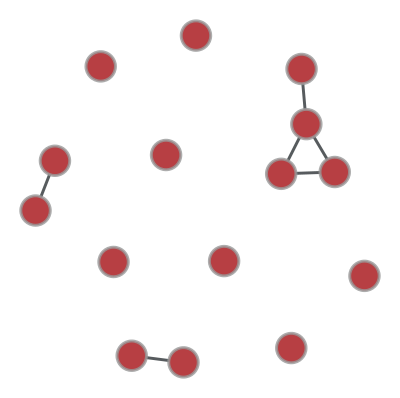


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18650>
        
        Network viz, node(s) removed 19
        
        


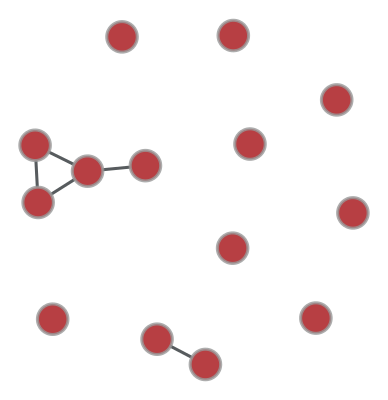


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18950>
        
        Network viz, node(s) removed 20
        
        


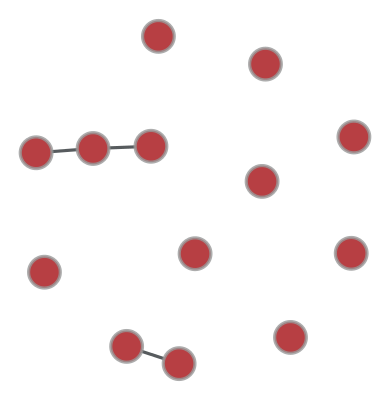


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18650>
        
        Network viz, node(s) removed 21
        
        


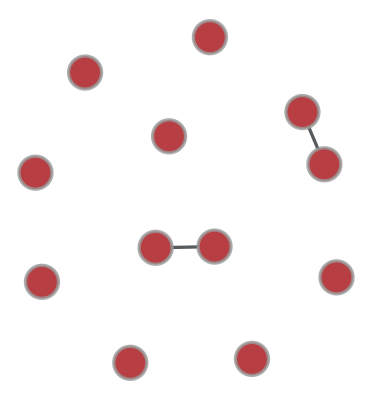


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d181d0>
        
        Network viz, node(s) removed 22
        
        


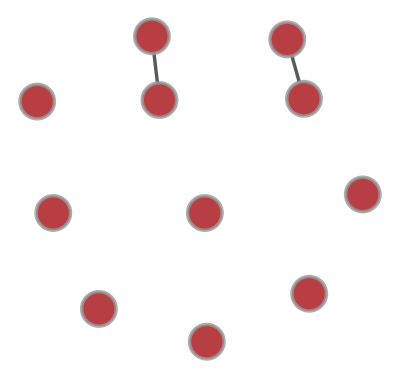


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1996af9d0>
        
        Network viz, node(s) removed 23
        
        


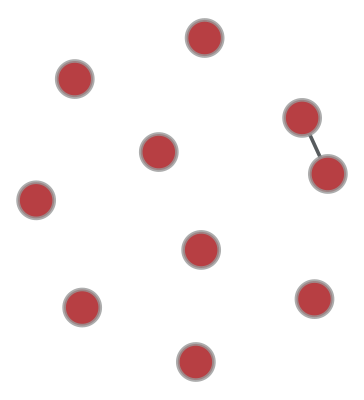


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d19050>
        
        Network viz, node(s) removed 24
        
        


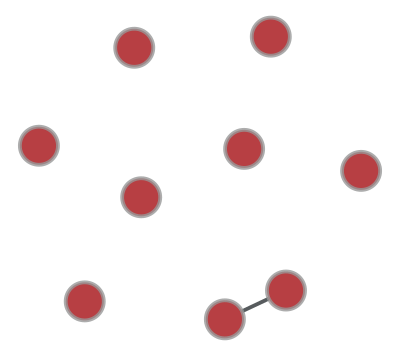


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18350>
        
        Network viz, node(s) removed 25
        
        


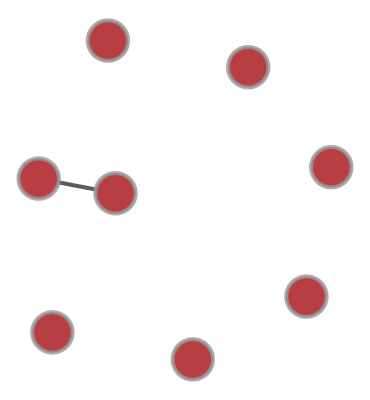


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c1390, at 0x1b6d18c10>
        
        Network viz, node(s) removed 26
        
        


In [13]:
# --+ Random node removal
# set-up copy
g_random = g.copy()
# set-up list
stages_random = []
stages_random.append(len(g_random.get_vertices()))
# run some stages
for i in range (0, 50, 1):
    try:
        a = np.random.randint(36)
        g_random.remove_vertex(a)
        cc = gt.extract_largest_component(g_random)
        stages_random.append(len(cc.get_vertices()))
        print("""
        {}
        
        Network viz, node(s) removed {}
        
        """.format(gt.graph_draw(g_random, output_size=(200,200)), stages_random[0]- len(g_random.get_vertices()))
        )
    except:
        pass

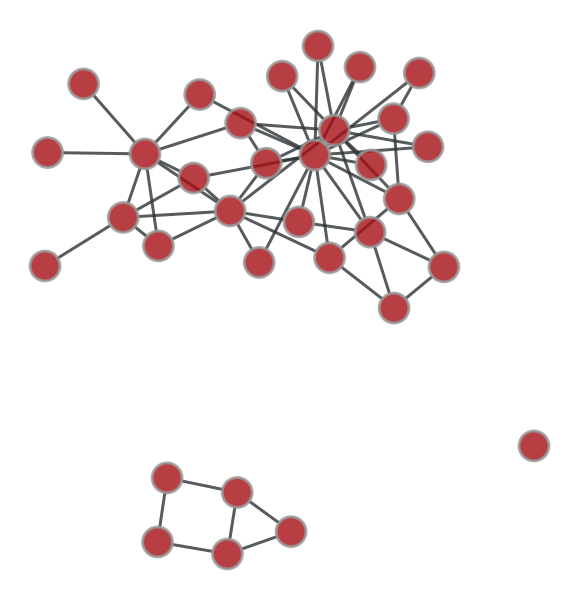


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1998f04d0>
        
        Network viz, node(s) removed 1
        
        


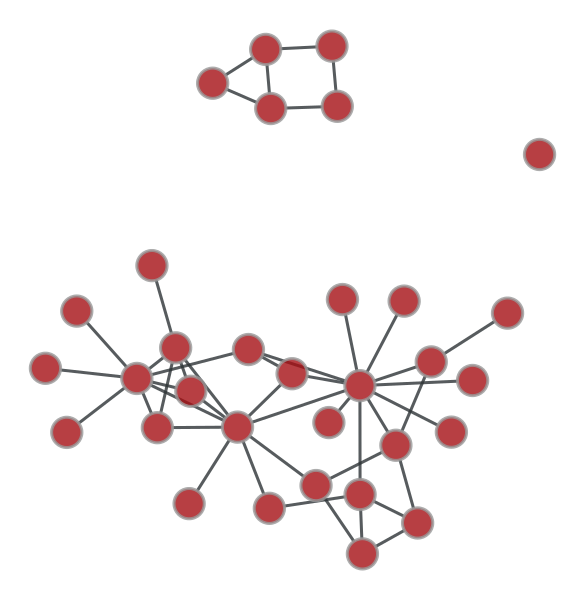


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d18990>
        
        Network viz, node(s) removed 2
        
        


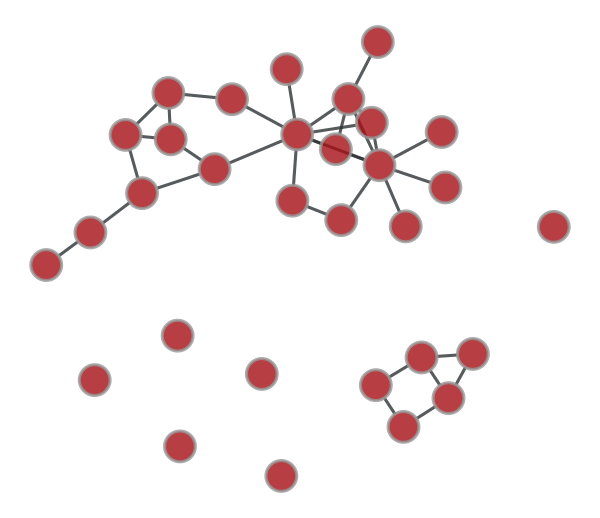


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d18cd0>
        
        Network viz, node(s) removed 3
        
        


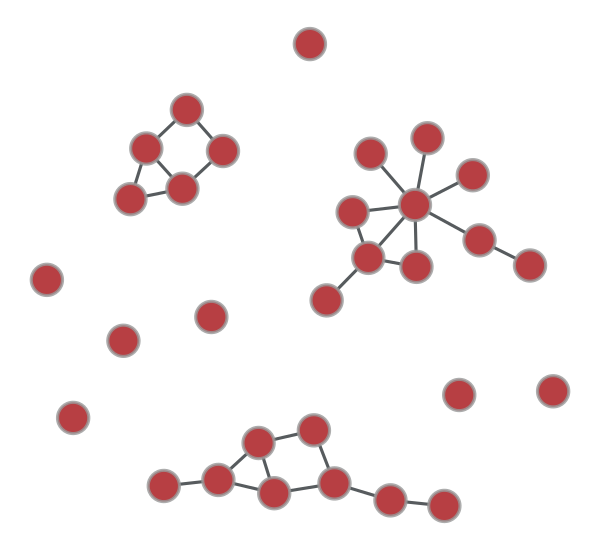


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d196d0>
        
        Network viz, node(s) removed 4
        
        


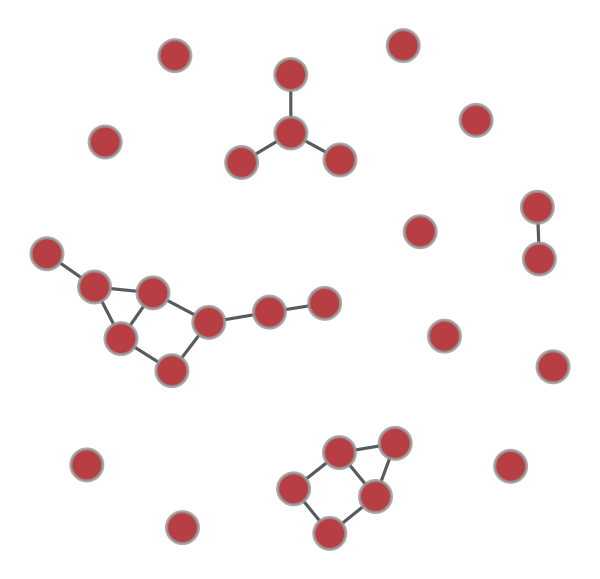


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d19f50>
        
        Network viz, node(s) removed 5
        
        


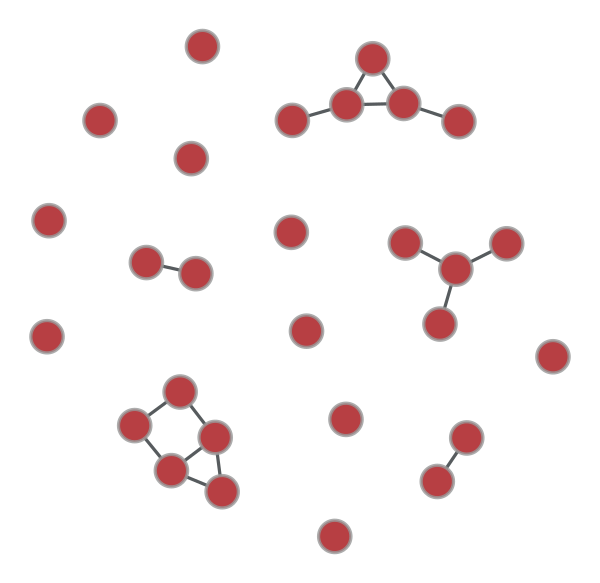


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1a190>
        
        Network viz, node(s) removed 6
        
        


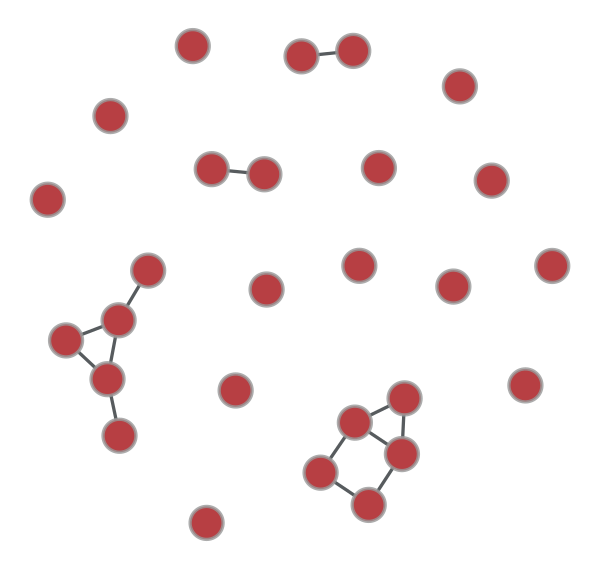


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1a910>
        
        Network viz, node(s) removed 7
        
        


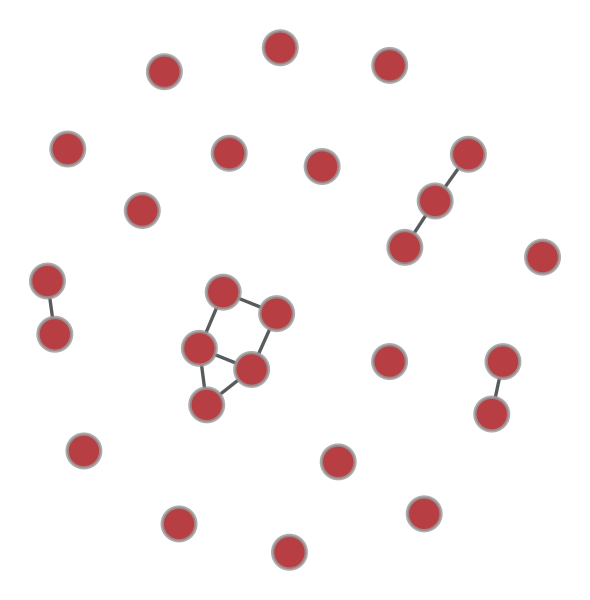


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1aad0>
        
        Network viz, node(s) removed 8
        
        


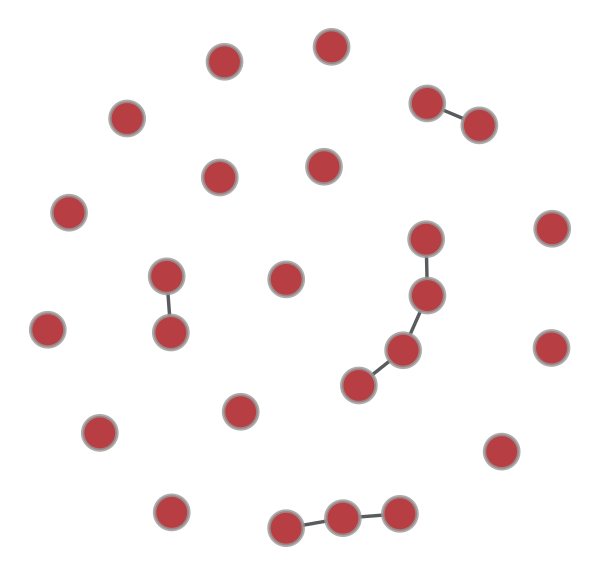


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1a790>
        
        Network viz, node(s) removed 9
        
        


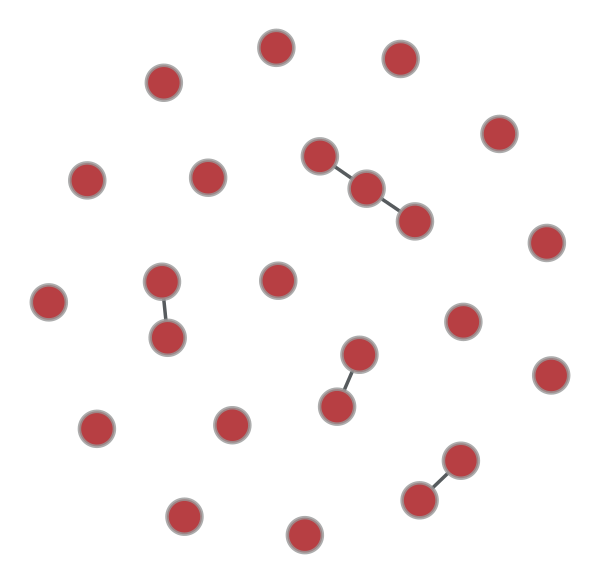


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1a0d0>
        
        Network viz, node(s) removed 10
        
        


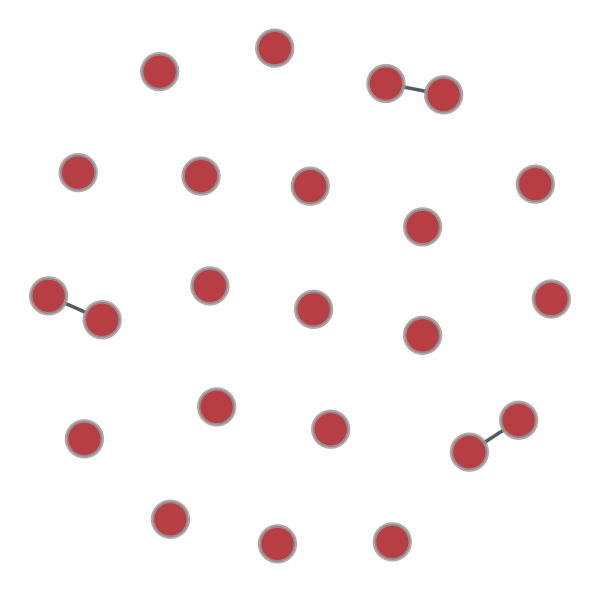


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1b210>
        
        Network viz, node(s) removed 11
        
        


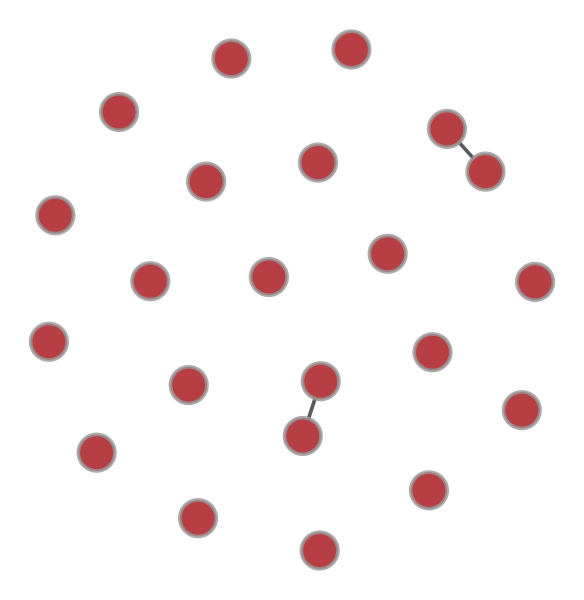


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1b550>
        
        Network viz, node(s) removed 12
        
        


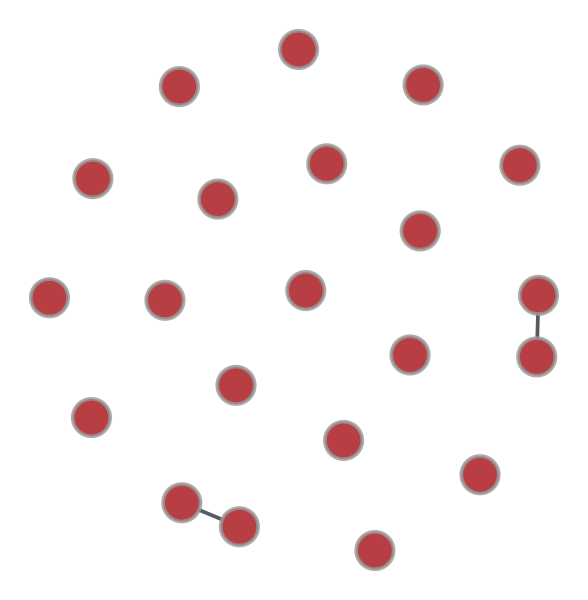


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1b710>
        
        Network viz, node(s) removed 13
        
        


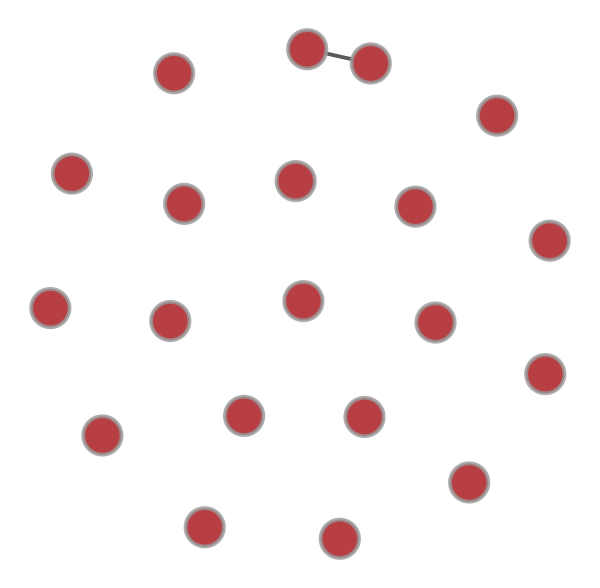


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d18e90>
        
        Network viz, node(s) removed 14
        
        


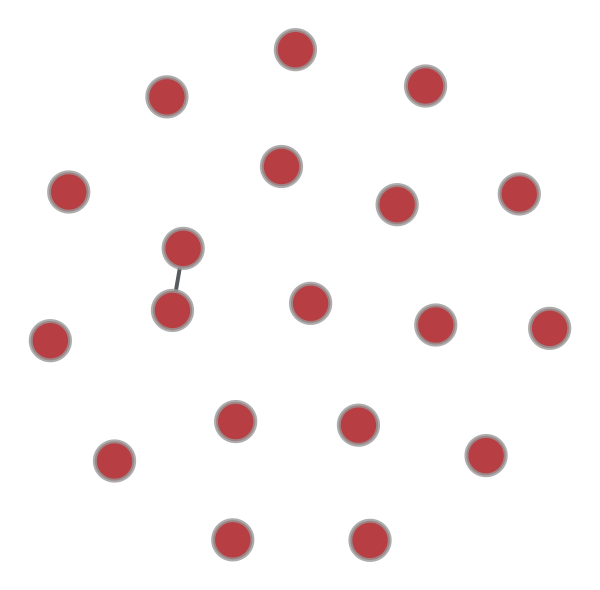


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d19e90>
        
        Network viz, node(s) removed 15
        
        


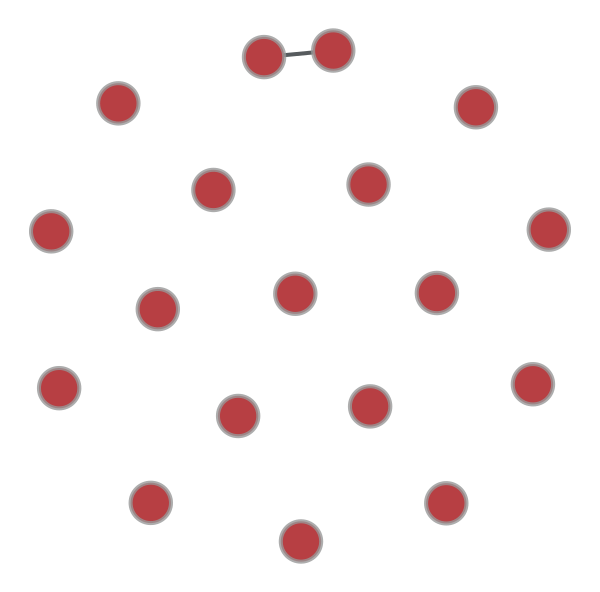


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d1bc90>
        
        Network viz, node(s) removed 16
        
        


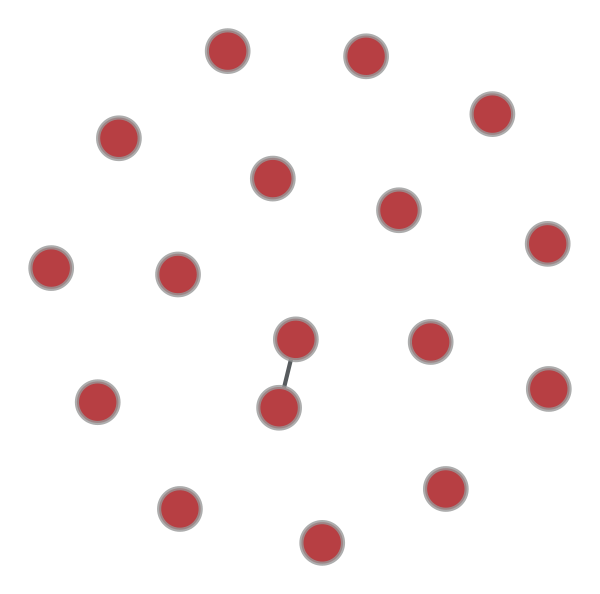


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d19150>
        
        Network viz, node(s) removed 17
        
        


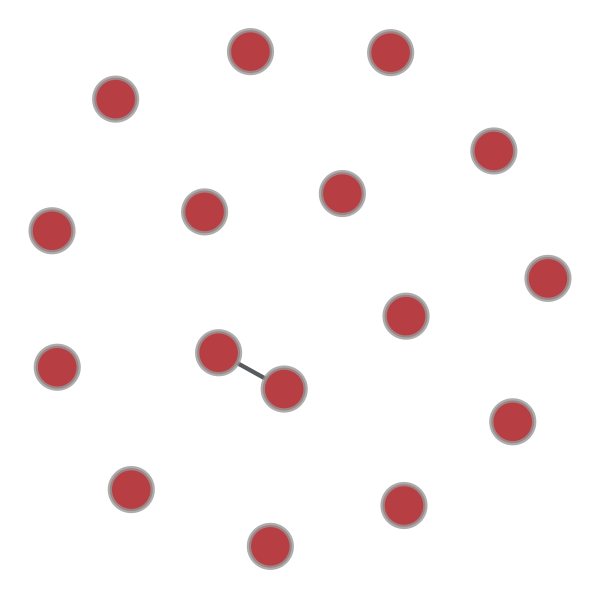


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24050>
        
        Network viz, node(s) removed 18
        
        


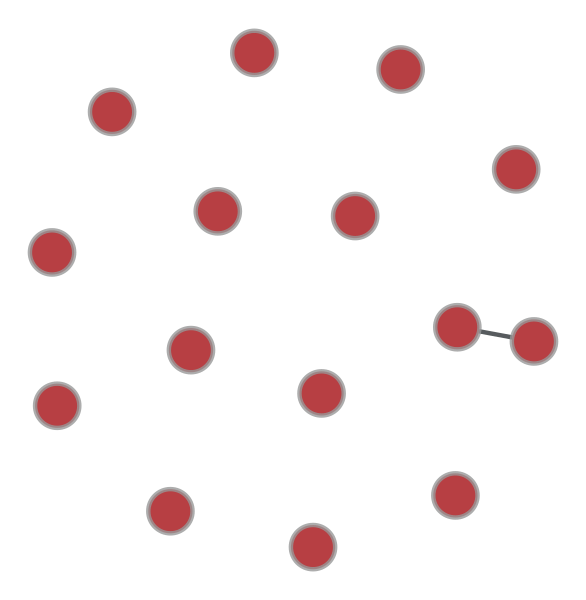


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24510>
        
        Network viz, node(s) removed 19
        
        


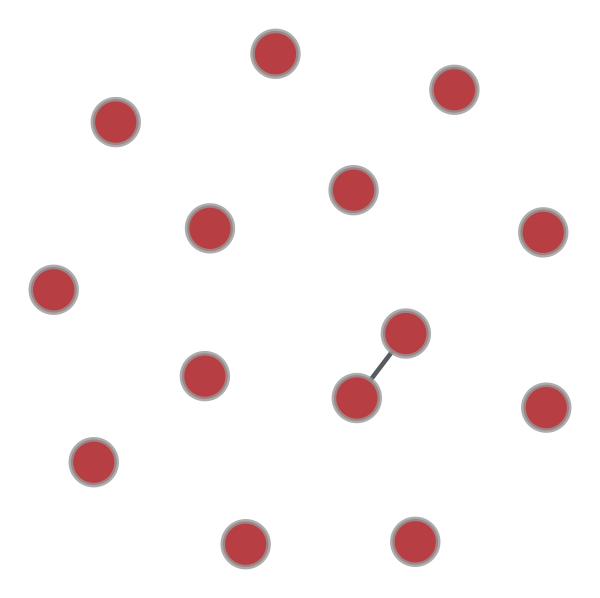


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24710>
        
        Network viz, node(s) removed 20
        
        


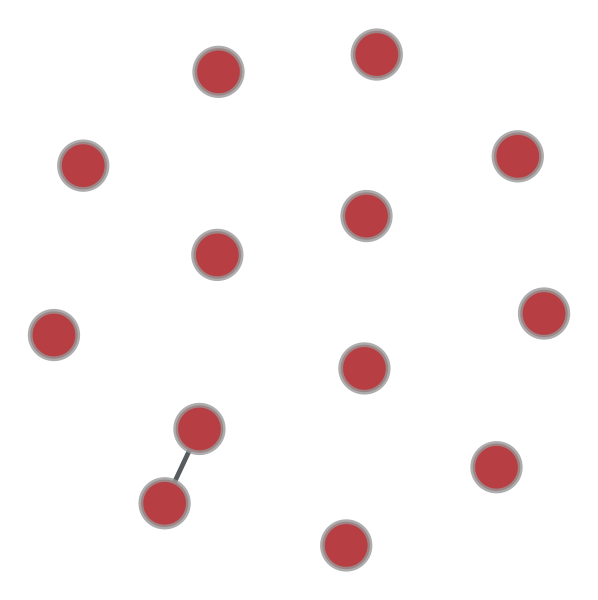


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24510>
        
        Network viz, node(s) removed 21
        
        


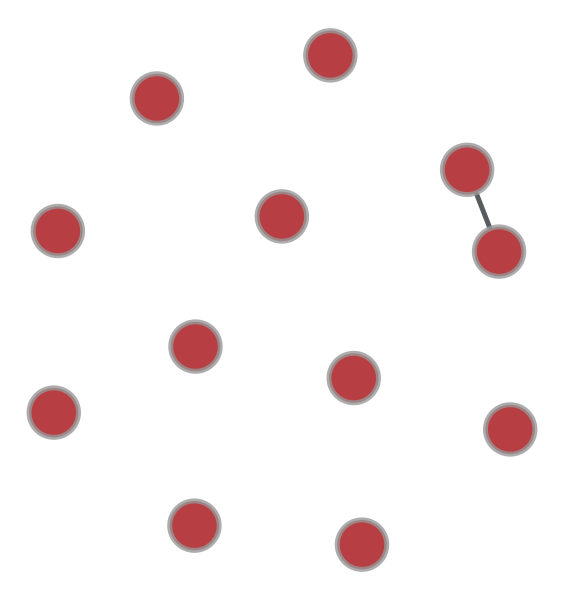


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24ad0>
        
        Network viz, node(s) removed 22
        
        


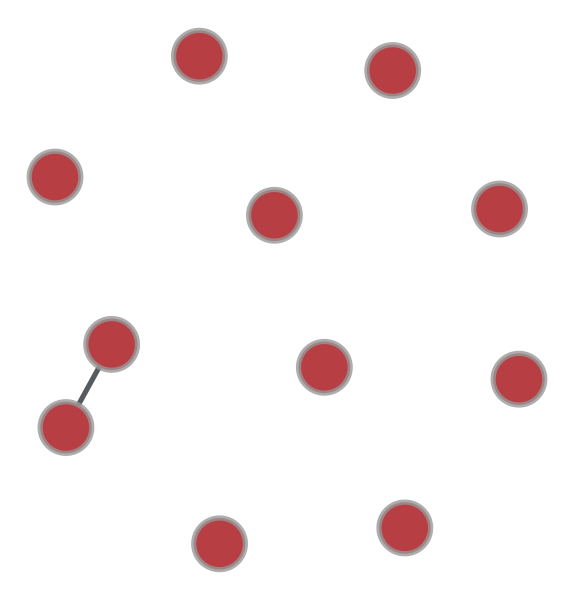


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24210>
        
        Network viz, node(s) removed 23
        
        


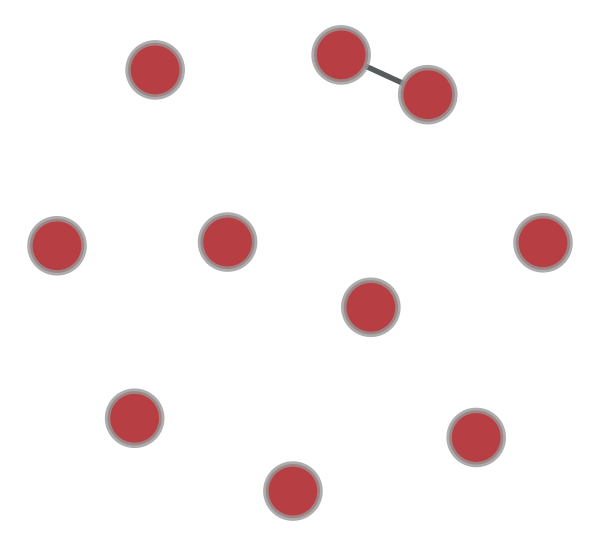


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24710>
        
        Network viz, node(s) removed 24
        
        


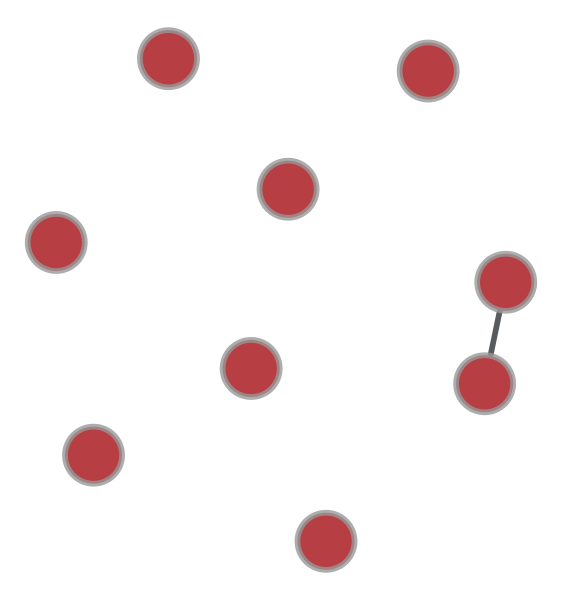


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d247d0>
        
        Network viz, node(s) removed 25
        
        


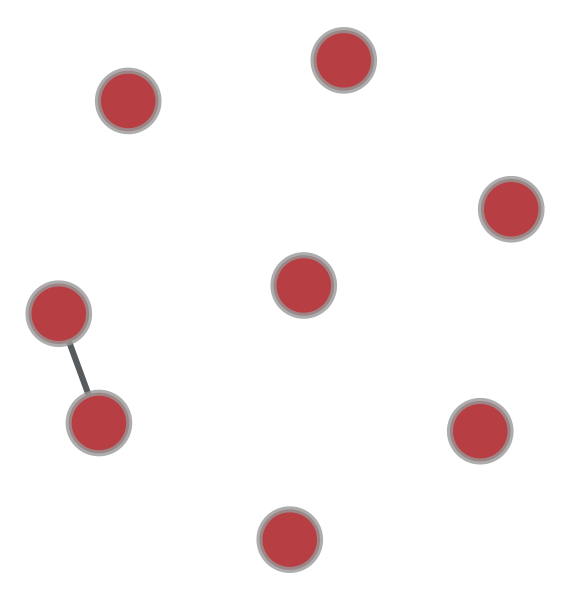


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24990>
        
        Network viz, node(s) removed 26
        
        


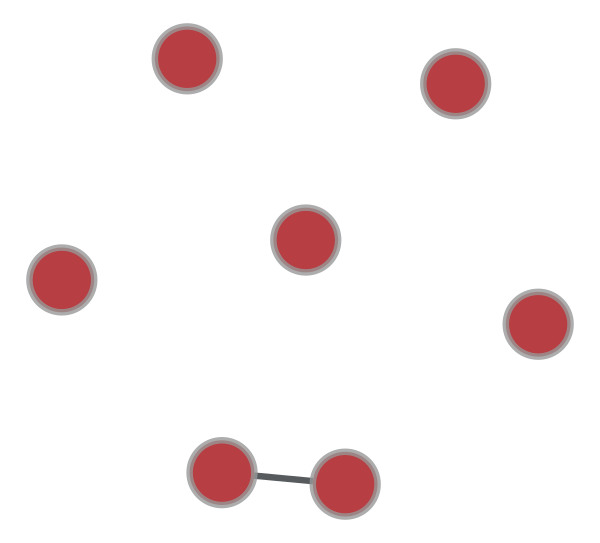


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d247d0>
        
        Network viz, node(s) removed 27
        
        


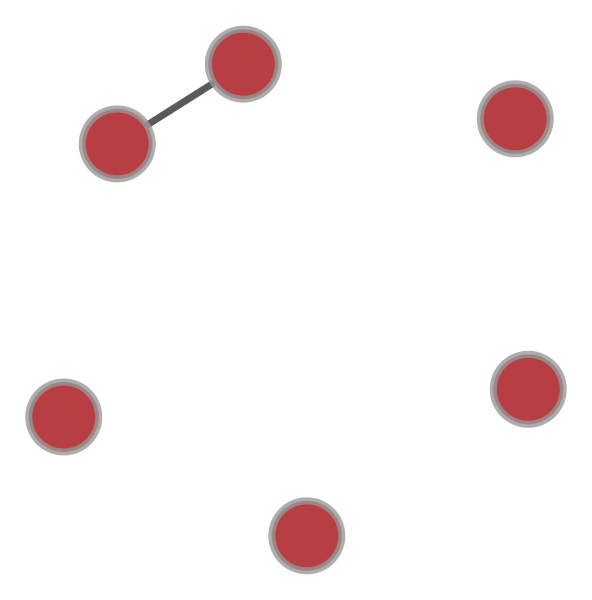


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d25250>
        
        Network viz, node(s) removed 28
        
        


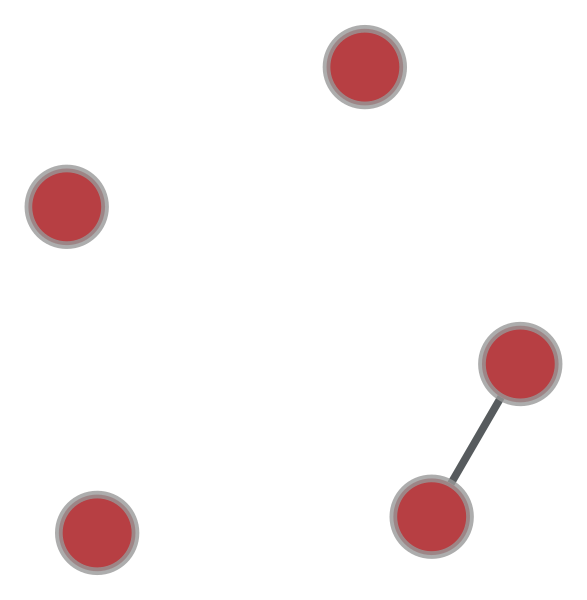


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d247d0>
        
        Network viz, node(s) removed 29
        
        


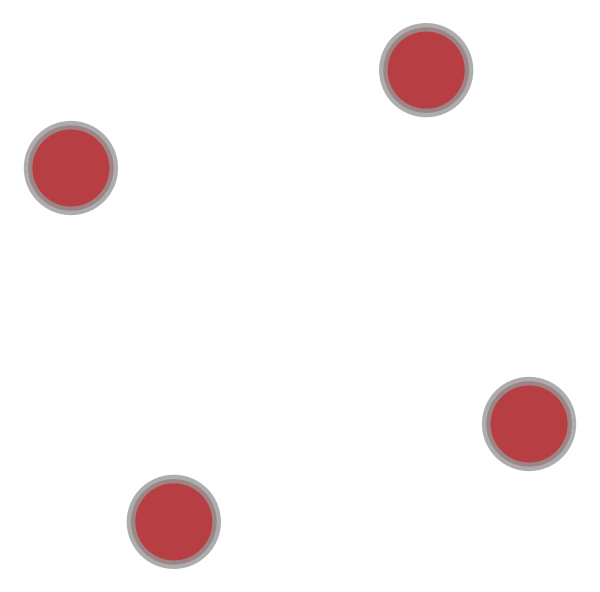


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d254d0>
        
        Network viz, node(s) removed 30
        
        


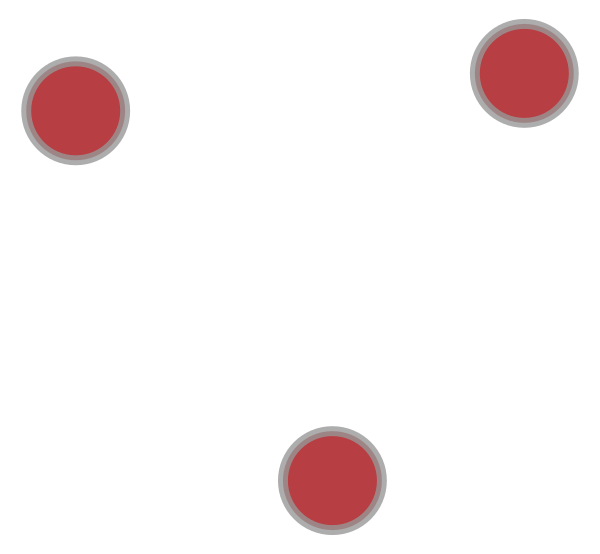


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1b6d24710>
        
        Network viz, node(s) removed 31
        
        


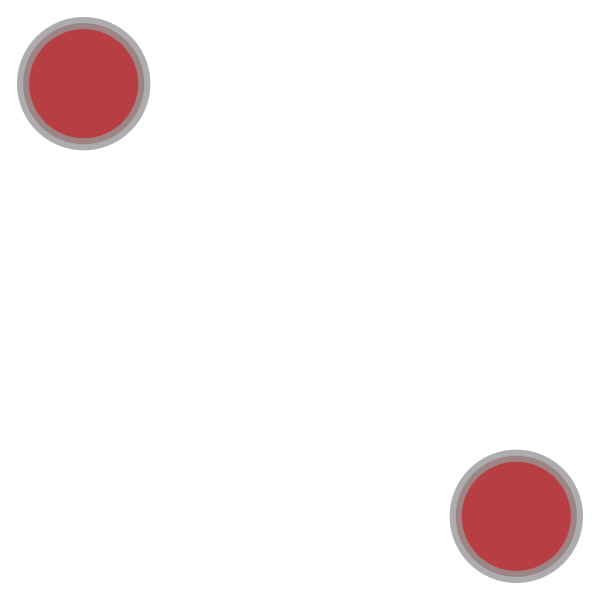


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1998c5c90>
        
        Network viz, node(s) removed 32
        
        


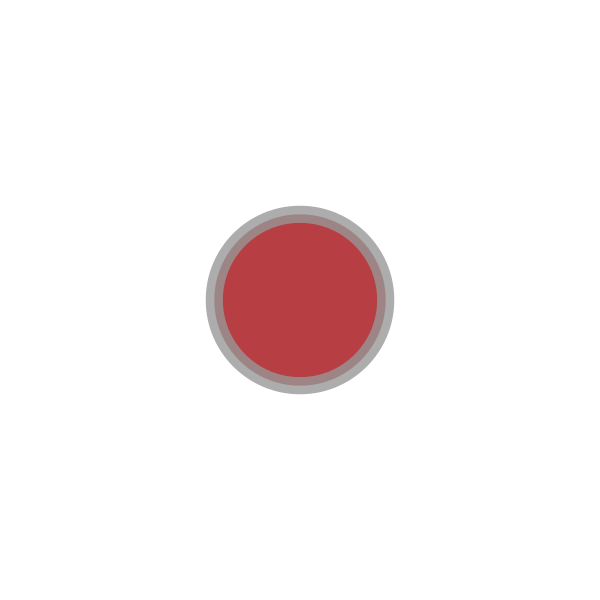


        <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1998dec50, at 0x1996ae9d0>
        
        Network viz, node(s) removed 33
        
        


In [14]:
# --+ Selective node removal
# set-up copy
g_attack = g.copy()
# set-up list
stages_attack = []
stages_attack.append(len(g_attack.get_vertices()))
# run some stages
for i in range(0, 35, 1):
    try:
        vp, ep = gt.betweenness(g_attack)
        a = np.array([i for i in vp])
        node = np.argwhere(a == a.max())[0][0]
        g_attack.remove_vertex(node)
        cc = gt.extract_largest_component(g_attack)
        stages_attack.append(len(cc.get_vertices()))
        print("""
        {}
        
        Network viz, node(s) removed {}
        
        """.format(gt.graph_draw(g_attack, output_size=(300,300)), stages_attack[0] - len(g_attack.get_vertices()))
        )
    except:
        pass

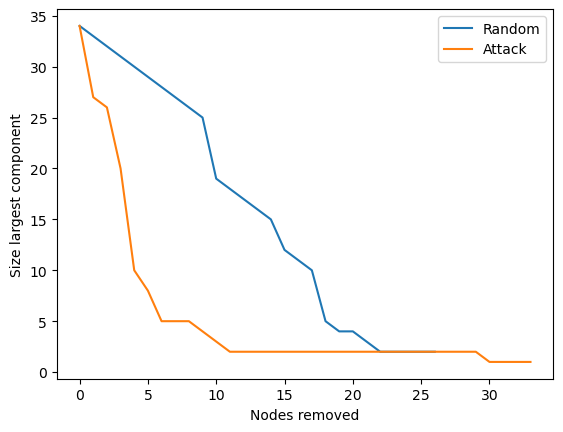

In [15]:
# Comparing random vs attack
plt.plot(stages_random, label="Random")
plt.plot(stages_attack, label="Attack")
plt.xlabel("Nodes removed")
plt.ylabel("Size largest component")
plt.legend()
plt.show()

## Random graph 

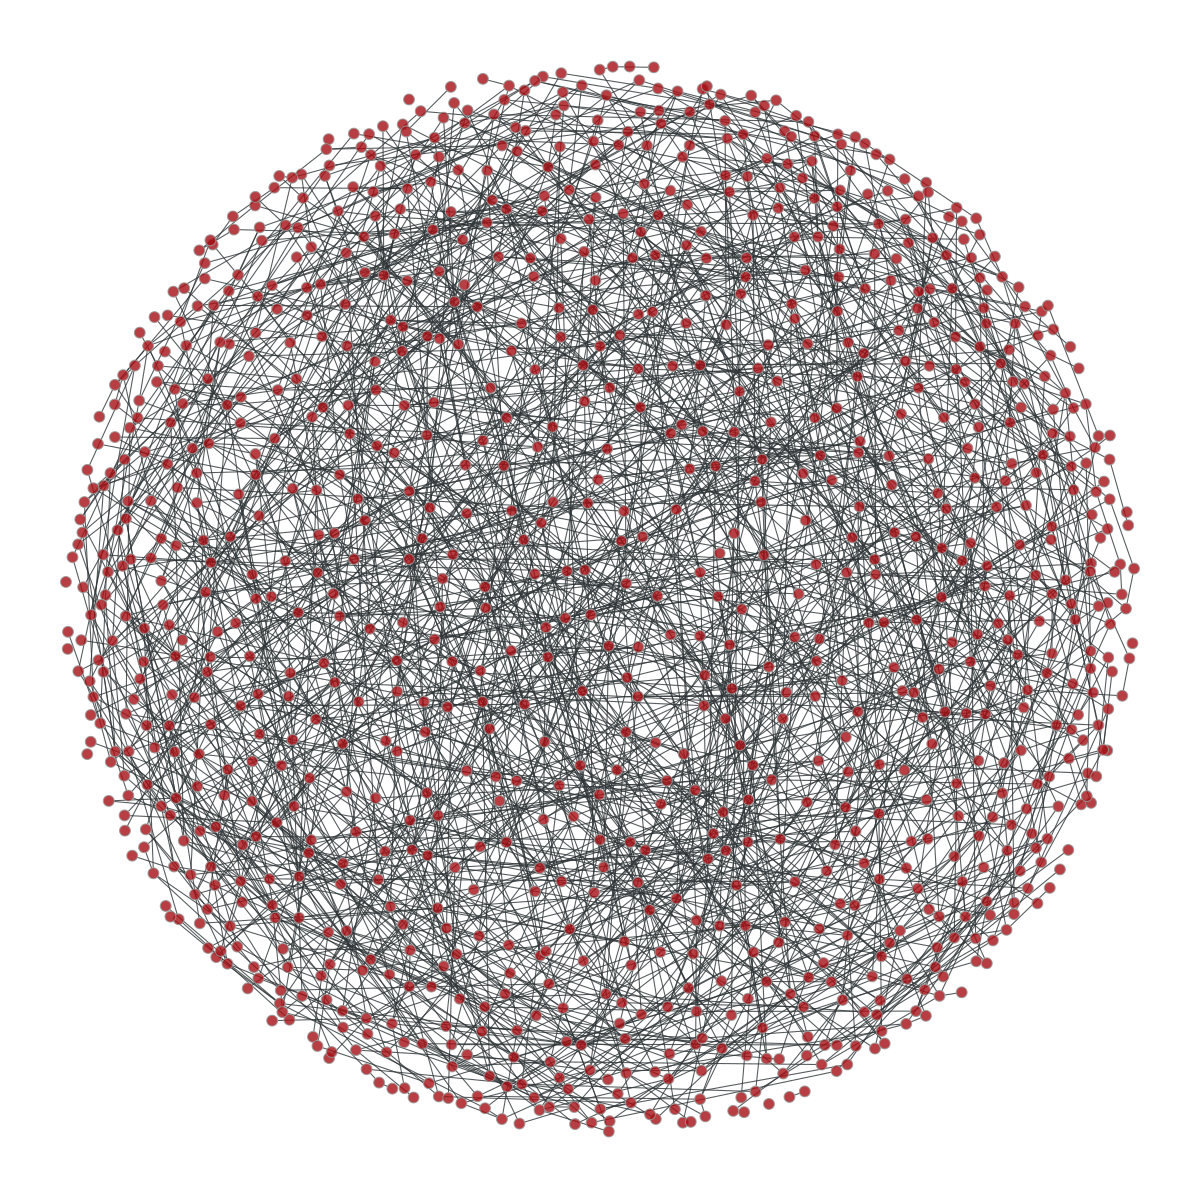

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1996c84d0, at 0x1b6d0d250>

In [16]:
# create a random graph
g = gt.random_graph(1000, 
                    lambda: np.random.randint(10), 
                    directed=False)
# rewire
erd = gt.random_rewire(g, model='erdos')
# set positions
pos = gt.arf_layout(g)
# draw network
gt.graph_draw(g, pos=pos)


Basic info:
    - Number of nodes: 1000
    - Number of edges: 2244
    - Size largest component: <GraphView object, undirected, with 988 vertices and 2243 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x1b6d97190, at 0x1b6d6e510>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x1b6d97190, at 0x1b6da3b50>, False), at 0x1b6d97190>
    - Pseudo diameter: 11.0


Degee:
    - Average 4.488
    - Max 13
    - Min 0



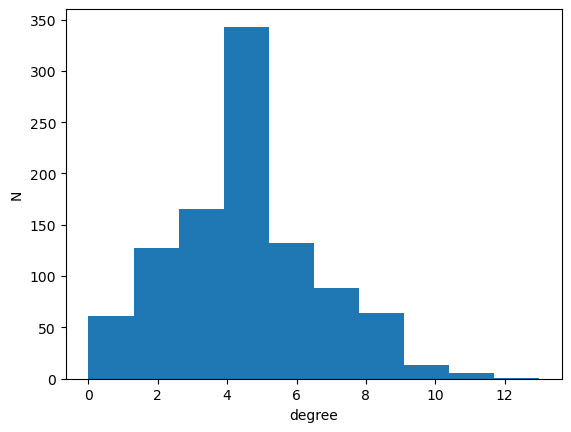


Centrality:
    - Max betweenness: 0.019097092624654925
    - Max eigenvector: 0.10178355442645468



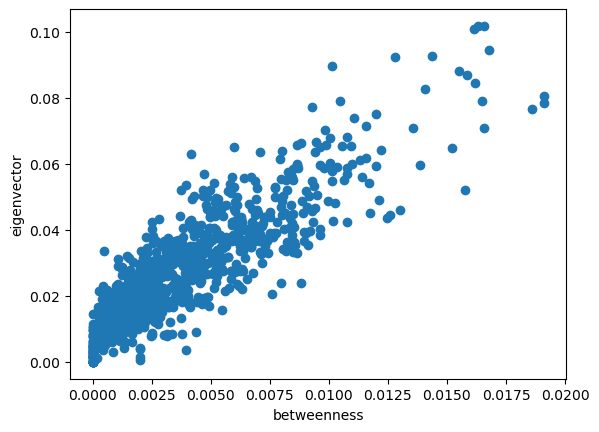

In [17]:
# --+ Descriptive analysis
# Basic info
print("""
Basic info:
    - Number of nodes: {}
    - Number of edges: {}
    - Size largest component: {}
    - Pseudo diameter: {}
""".format(len(g.get_vertices()), 
           len(g.get_edges()), 
           gt.extract_largest_component(g),
           gt.pseudo_diameter(g)[0])
)

# Degree
degree = [i.out_degree() for i in g.vertices()]
print("""
Degee:
    - Average {}
    - Max {}
    - Min {}
""".format(np.mean(degree),
          max(degree),
          min(degree))
     )

plt.hist(degree)
plt.xlabel("degree")
plt.ylabel("N")
plt.show()

# Centrality
vp, ep = gt.betweenness(g)
ee, x = gt.eigenvector(g)
print("""
Centrality:
    - Max betweenness: {}
    - Max eigenvector: {}
""".format(np.array([i for i in vp]).max(),
          np.array([i for i in x]).max())
     )

plt.scatter([i for i in vp], [i for i in x])
plt.xlabel("betweenness")
plt.ylabel("eigenvector")
plt.show()

In [18]:
#--+ Selective node removal
# sort vertices
vertices = sorted([v for v in g.vertices()], key=lambda v: v.out_degree())
# compute percolation
sizes, comp = gt.vertex_percolation(g, vertices)
#--+ Random node removal
# reshuffle vertices
np.random.shuffle(vertices)
# compute percolation
sizes2, comp = gt.vertex_percolation(g, vertices)

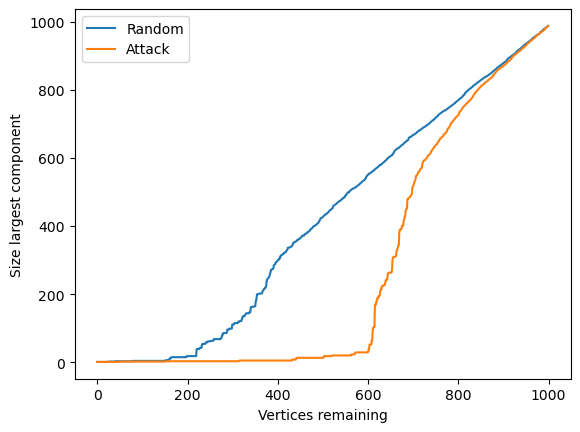

In [19]:
# Plot
plt.plot(sizes2, label="Random")
plt.plot(sizes, label="Attack")
plt.xlabel("Vertices remaining")
plt.ylabel("Size largest component")
plt.legend(loc="upper left")
plt.show()

## Communities

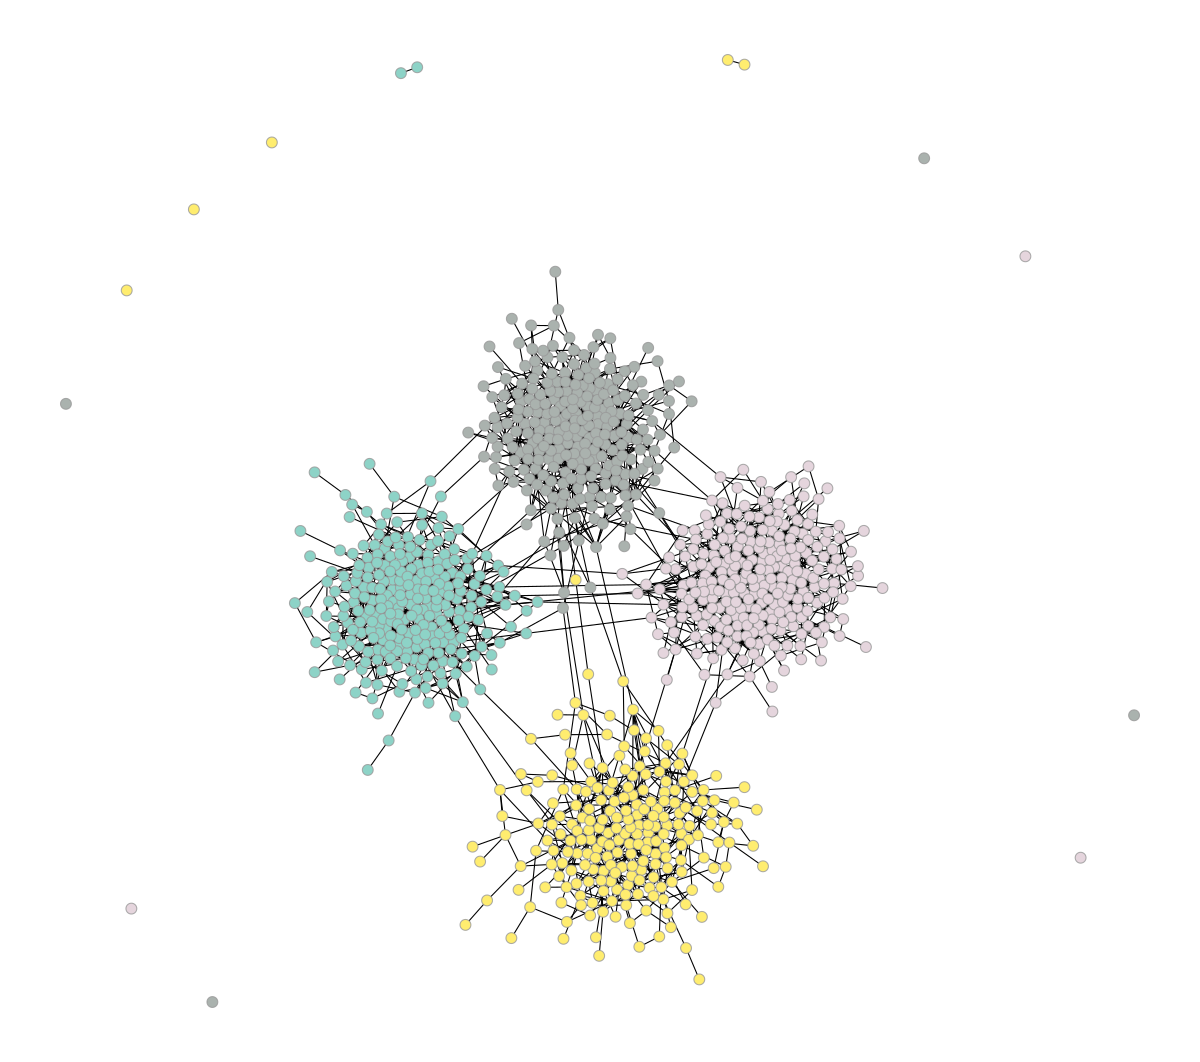

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1b6d58550, at 0x1b6d6c490>

In [20]:
# set up edge probability
def prob(a, b):
    if a == b:
        return 0.999
    else:
        return 0.001
# create a random graph with k communities
k = 4
g, bm = gt.random_graph(1000, 
                        lambda: np.random.randint(10), 
                        directed=False,
                        model="blockmodel",
                        block_membership=lambda: np.random.randint(k),
                        edge_probs=prob)
# plot
gt.graph_draw(g, 
              vertex_fill_color=bm, 
              edge_color="black",)


Basic info:
    - Number of nodes: 1000
    - Number of edges: 2225
    - Size largest component: <GraphView object, undirected, with 986 vertices and 2223 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x1b6d86b10, at 0x1b6d46510>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x1b6d86b10, at 0x1b6e42650>, False), at 0x1b6d86b10>
    - Pseudo diameter: 13.0


Degee:
    - Average 4.45
    - Max 11
    - Min 0



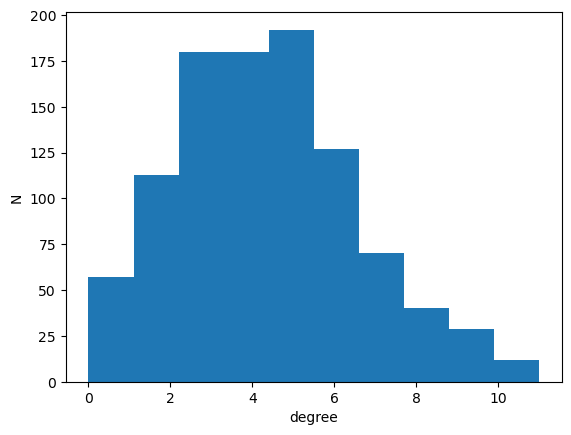


Centrality:
    - Max betweenness: 0.07383035574424399
    - Max eigenvector: 0.17674268491620196



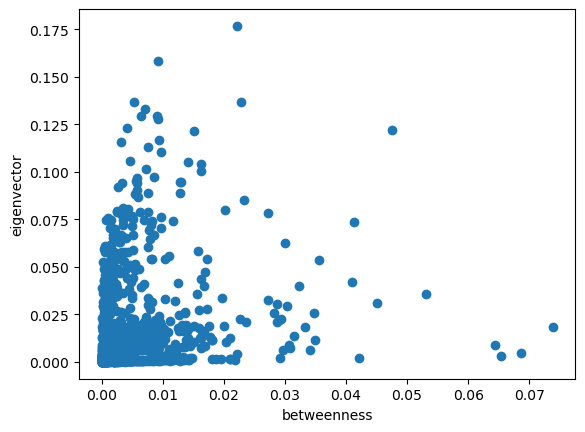

In [21]:
# --+ Descriptive analysis
# Basic info
print("""
Basic info:
    - Number of nodes: {}
    - Number of edges: {}
    - Size largest component: {}
    - Pseudo diameter: {}
""".format(len(g.get_vertices()), 
           len(g.get_edges()), 
           gt.extract_largest_component(g),
           gt.pseudo_diameter(g)[0])
)

# Degree
degree = [i.out_degree() for i in g.vertices()]
print("""
Degee:
    - Average {}
    - Max {}
    - Min {}
""".format(np.mean(degree),
          max(degree),
          min(degree))
     )

plt.hist(degree)
plt.xlabel("degree")
plt.ylabel("N")
plt.show()

# Centrality
vp, ep = gt.betweenness(g)
ee, x = gt.eigenvector(g)
print("""
Centrality:
    - Max betweenness: {}
    - Max eigenvector: {}
""".format(np.array([i for i in vp]).max(),
          np.array([i for i in x]).max())
     )

plt.scatter([i for i in vp], [i for i in x])
plt.xlabel("betweenness")
plt.ylabel("eigenvector")
plt.show()

In [22]:
#--+ Selective node removal
# sort vertices
vertices = sorted([v for v in g.vertices()], key=lambda v: v.out_degree())
# compute percolation
sizes, comp = gt.vertex_percolation(g, vertices)
#--+ Random node removal
# reshuffle vertices
np.random.shuffle(vertices)
# compute percolation
sizes2, comp = gt.vertex_percolation(g, vertices)

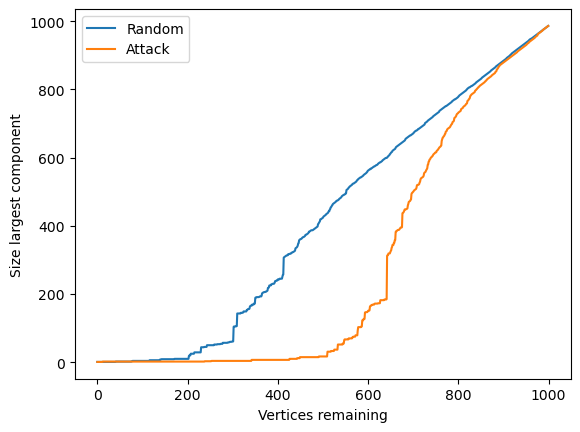

In [23]:
# Plot
plt.plot(sizes2, label="Random")
plt.plot(sizes, label="Attack")
plt.xlabel("Vertices remaining")
plt.ylabel("Size largest component")
plt.legend(loc="upper left")
plt.show()

## Internet

In [24]:
# load internet graph
g = gt.collection.data["as-22july06"]


Basic info:
    - Number of nodes: 22963
    - Number of edges: 48436
    - Size largest component: <GraphView object, undirected, with 22963 vertices and 48436 edges, 2 internal vertex properties, 2 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x1b6f6c550, at 0x1b6f25f90>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x1b6f6c550, at 0x1b6f26e50>, False), at 0x1b6f6c550>
    - Pseudo diameter: 11.0


Degee:
    - Average 4.218612550624918
    - Max 2390
    - Min 1



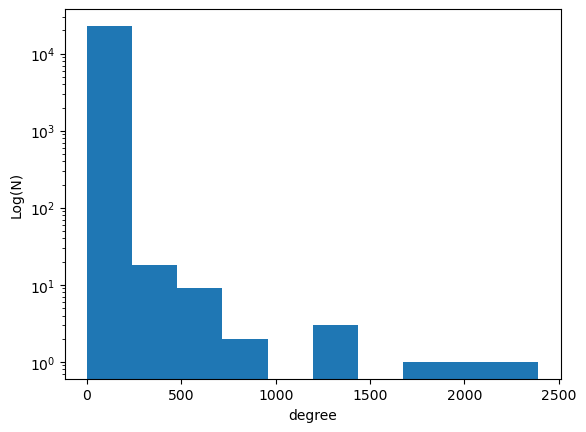


Centrality:
    - Max betweenness: 0.14469692916385085
    - Max eigenvector: 0.24434302260018373



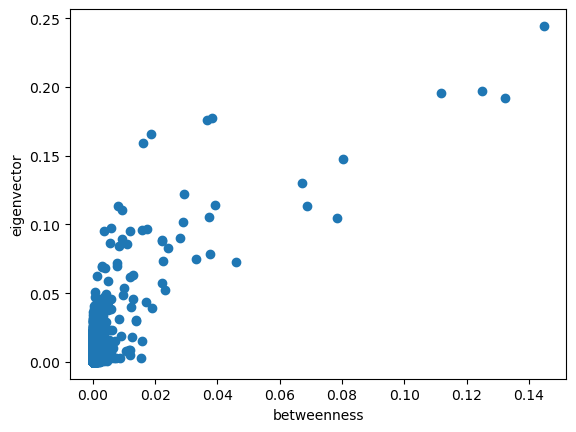

In [25]:
# --+ Descriptive analysis
# Basic info
print("""
Basic info:
    - Number of nodes: {}
    - Number of edges: {}
    - Size largest component: {}
    - Pseudo diameter: {}
""".format(len(g.get_vertices()), 
           len(g.get_edges()), 
           gt.extract_largest_component(g),
           gt.pseudo_diameter(g)[0])
)

# Degree
degree = [i.out_degree() for i in g.vertices()]
print("""
Degee:
    - Average {}
    - Max {}
    - Min {}
""".format(np.mean(degree),
          max(degree),
          min(degree))
     )

plt.hist(degree, log=True)
plt.xlabel("degree")
plt.ylabel("Log(N)")
plt.show()

# Centrality
vp, ep = gt.betweenness(g)
ee, x = gt.eigenvector(g)
print("""
Centrality:
    - Max betweenness: {}
    - Max eigenvector: {}
""".format(np.array([i for i in vp]).max(),
          np.array([i for i in x]).max())
     )

plt.scatter([i for i in vp], [i for i in x])
plt.xlabel("betweenness")
plt.ylabel("eigenvector")
plt.show()

In [26]:
#--+ Selective node removal
# sort vertices
vertices = sorted([v for v in g.vertices()], key=lambda v: v.out_degree())
# compute percolation
sizes, comp = gt.vertex_percolation(g, vertices)
#--+ Random node removal
# reshuffle vertices
np.random.shuffle(vertices)
# compute percolation
sizes2, comp = gt.vertex_percolation(g, vertices)

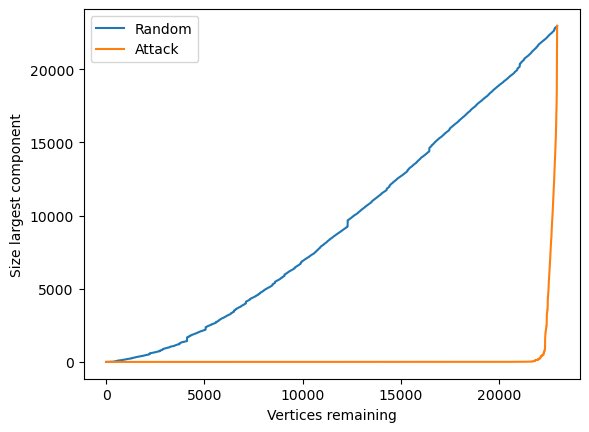

In [27]:
# Plot
plt.plot(sizes2, label="Random")
plt.plot(sizes, label="Attack")
plt.xlabel("Vertices remaining")
plt.ylabel("Size largest component")
plt.legend(loc="upper left")
plt.show()